# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»
* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [5]:
# Оставляем два признака - sepal_length и sepal_width
data.drop(data.columns[[-1,-2]], axis='columns', inplace = True)
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [7]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# модель LDA

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0,
       0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [12]:
result

,0,1
0,0,0
1,2,2
2,1,1
3,2,2
4,1,1
5,0,0
6,2,2
7,1,2
8,2,2
9,2,2


In [13]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

In [15]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-6.75080756,  9.46287071],
       [ 2.05632727, -4.68638449],
       [ 4.95811199, -5.37730475]])

In [16]:
# центроиды
lda.means_

array([[5.03846154, 3.5025641 ],
       [5.95882353, 2.80588235],
       [6.66153846, 3.02051282]])

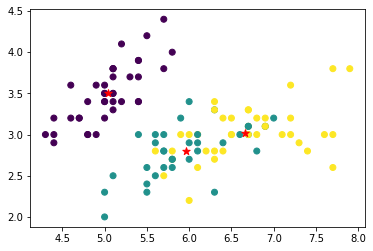

In [17]:
# Визуализируем предсказания для тестовой выборки и центры классов
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=60, marker='*')
plt.show()

Как указано в описании корреляция между классом цветка и длиной (sepal length) его чашелистика равна 0,78, а корреляция между классом цветка и шириной (sepal width) его чашелистика равна -0,42. Это отражено на графике выше, то есть первый признак (длина чашелистика) важнее второго почти в 2 раза.
По длине чашелистика можно с какой-то вероятностью отнести цветок к какому-то классу, в тоже время по ширине чашелистика практически нельзя ничего сказать о принадлежности к какому-то классу, например, при ширине равной 3 см класс цветка ириса может быть любой из трех.
Один класс сильно отделяется от других (фиолетовый), в нем есть набор точек из длин и ширин чашелистика, который говорит о принадлежности этих двух признаков данному классу. Остальные два класса перемешаны в некоторой небольшой области.

## Кластерный анализ

* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [19]:
from sklearn.cluster import KMeans

In [20]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

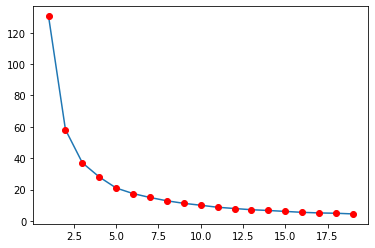

In [21]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

По методу локтя количество кластеров где-то около 3, как раз и классов у нас 3.

In [22]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

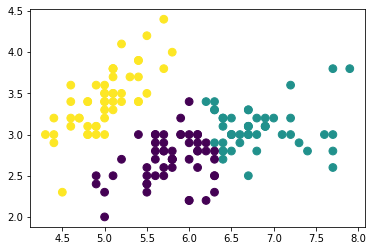

In [23]:
plt.scatter(data[['sepal length (cm)']], data[['sepal width (cm)']], c=clusters, s=60)

Метод кластерного анализа К-средних показал хорошее соответствие с методом LDA. 
* Разбиение на 3 кластера оптимально, так как у нас 3 класса. Разбиение прошло очень точно для одного класса, и грубовато для двух остальных, так как они пересекаются. 